In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#lIBRERÍAS ML 
#Aprendizaje supervisado : cuando se busca predecir 
#La clase train_test_split divide el dataset de forma aleatoria en datos de entrenamiento y datos de prueba
from sklearn.model_selection import train_test_split

#Predecir la especie de la flor Iris
#Algoritmo 1 :  Bosque aleatorio  -   RandomForestClassifier(n_estimators=100,random_state=42)
from sklearn.ensemble import RandomForestClassifier  

#Algoritmo 2    Regresión Logística  -  LogisticRegression(random_state=42, max_iter=200)
from  sklearn.linear_model import LogisticRegression   

#Algoritmo 3    Máquinas de vectores de soporte  -  SVC(random_state=42)
from sklearn.svm  import SVC

 
#Algoritmo 4    Vecinos Más Cercanos  -   KNeighborsClassifier(n_neighbors=5)
from sklearn.neighbors import KNeighborsClassifier


#Algoritmo 5   Arboles de decisión para clasificación - DecisionTreeClassifier(random_state=42)
from sklearn.tree import DecisionTreeClassifier
    
#Métricas
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
#1)Cargar el dataset
df = pd.read_csv( "iris.csv" )

In [4]:
#2)Exploración Inicial del Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   148 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#3)Qué valores toma la variable dependiente ( variable que se desea predecir,variable objetivo o variable target)

print( df[ "species" ].unique() )
print()
print( df[ "species" ].value_counts()  )


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


# PREPARAR (PRE PROCESAMIENTO) LOS DATOS

In [11]:
#4)Cantidad de nulos
df.isnull().sum()

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,148.000000,150.000000,147.000000
mean,5.843333,3.045946,3.758667,1.195238
std,0.828066,0.430532,1.764420,0.761247
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='sepal_width', ylabel='Count'>

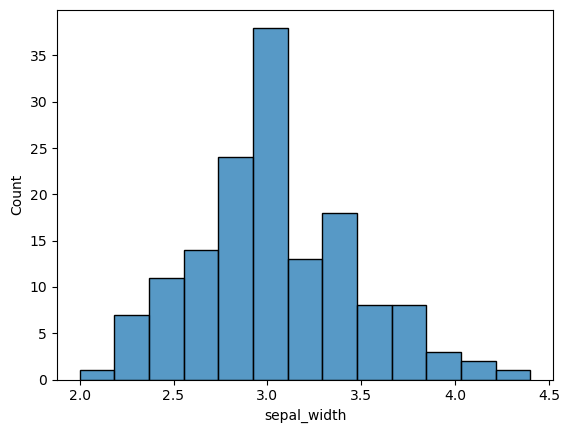

In [10]:
#5) Limpieza de datos :variables tipo numéricas
#Reemplazar los nulos con la media,mediana o moda
#5A) SepalWidthCm          2 nulos
sns.histplot( data = df, x = "sepal_width" )

In [14]:
# Reemplazar valores nulos con la mediana
mediana_sepal_width = df[ "sepal_width" ].median()
promedio_sepal_width = df[ "sepal_width" ].mean()
moda_sepal_width = df[ "sepal_width" ].mode() [0]

print( "Mediana = ", mediana_sepal_width )
print( "promedio = ", promedio_sepal_width )
print( "moda = ", moda_sepal_width )

df[ "sepal_width" ].fillna( mediana_sepal_width, inplace = True )

print( df.isnull().sum() )


Mediana =  3.0
promedio =  3.0459459459459466
moda =  3.0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     3
species         0
dtype: int64


<Axes: xlabel='petal_width', ylabel='Count'>

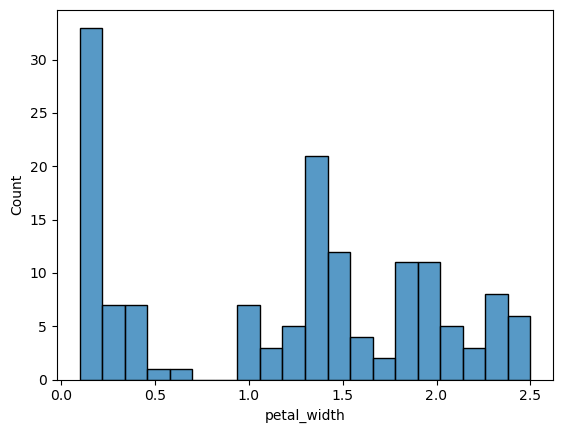

In [16]:
#5B)PetalWidthCm          3 nulos
#Reemplazar los nulos con la media,mediana o moda
sns.histplot( data = df, x = "petal_width", bins = 20 )

In [18]:
# Reemplazar valores nulos con la móda
mediana_petal_width = df[ "petal_width" ].median()
promedio_petal_width = df[ "petal_width" ].mean()
moda_petal_width = df[ "petal_width" ].mode() [0]

print( "Mediana = ", mediana_petal_width )
print( "promedio = ", promedio_petal_width )
print( "moda = ", moda_petal_width )

df[ "petal_width" ].fillna( moda_petal_width, inplace = True )

print()
print( df.isnull().sum() )

Mediana =  1.3
promedio =  1.1952380952380954
moda =  0.2

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [21]:
#7) Limpieza de datos :variables categóricas( tipo object )
print( df["species"].unique( ) )

df["species"].replace( ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] , [0, 1, 2], inplace = True)

print()
print( df["species"].unique( ) )

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

[0 1 2]


In [24]:
#8)Preparación de Datos para Entrenamiento y Prueba.

# a) Crear un DataFrame (x) con las variables independientes (predictoras)
x = df[ [ "sepal_length", "sepal_width", "petal_length", "petal_width"] ]

# b) Crear un DataFrame (y) con la variable dependiente (target)
y = df["species"]

print( "x = ", x.shape )
print( "y = ", y.shape )

# c) Dividir la data en datos de entrenamiento (80%) y datos de prueba (20%) con semilla fija
x_train, x_test, y_train, y_test = train_test_split( x, y, random_state = 2 )

print( "x_train = ", x_train.shape )
print( "y_train = ", y_train.shape )
print( "x_test = ", x_test.shape )
print( "y_test = ", y_test.shape )


x =  (150, 4)
y =  (150,)
x_train =  (112, 4)
y_train =  (112,)
x_test =  (38, 4)
y_test =  (38,)


# Aplicación de Algoritmos de Machine Learning

In [25]:
# Creamos los modelos a utilizar
# Crear el modelo de Bosque Aleatorio
modelo1 = RandomForestClassifier(n_estimators=100,random_state=42)
# Crear el modelo 2 de Regresión Logística para clasificación
modelo2 = LogisticRegression(random_state=42, max_iter=200)
#Crear el modelo 3 Máquinas de Vectores de Soporte
modelo3 = SVC(random_state=42)
# Crear el modelo 4 de Vecinos Más Cercanos (KNN)
modelo4 = KNeighborsClassifier(n_neighbors=5)
# Crear el modelo 5 de Árboles de Decisión
modelo5 = DecisionTreeClassifier(random_state=42)


In [629]:
#9A)  ALGORITMO DE MACHINE LEARNING : BOSQUE ALEATORIO - RANDON FOREST


In [26]:
# b) Entrenar al modelo
modelo1.fit( x_train, y_train )
# c) Validar al modelo
y_pred = modelo1.predict( x_test )

# Mostrar las predicciones
print( y_pred )
print()
print( y_test.to_numpy() )


[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2 1 0 1 2 1 0 2
 1]

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 1 1 2 1 1 0 0 2 0 2 2 0 1 2 1 0 2
 1]


In [27]:
# d) Métricas de Evaluación
# d1) Exactitud del modelo
exactitud1 = accuracy_score(y_test, y_pred)
exactitud1

0.9473684210526315

In [28]:
# d2) Crear y mostrar la matriz de confusión
cm = confusion_matrix( y_test, y_pred )
cm


array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 10]], dtype=int64)

In [633]:
#9B)  ALGORITMO DE MACHINE LEARNING : REGRESIÓN LOGÍSTICA - lOGISTIC REGRESSION

In [33]:
# b) Entrenar al modelo 2
modelo2.fit( x_train, y_train )

y_pred = modelo2.predict( x_test )

# Mostrar las predicciones
print( y_pred )
print()
print( y_test.to_numpy() )

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2 1 0 1 2 1 0 2
 1]

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 1 1 2 1 1 0 0 2 0 2 2 0 1 2 1 0 2
 1]


In [34]:
# d) Métricas de Evaluación
# d1) Exactitud del modelo 2
exactitud2 = accuracy_score(y_test, y_pred)
exactitud2

0.9473684210526315

In [35]:
# Crear la matriz de confusión
# d2) Crear y mostrar la matriz de confusión 
cm = confusion_matrix( y_test, y_pred )
cm


array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 10]], dtype=int64)

In [637]:
#9C)  ALGORITMO DE MACHINE LEARNING : BOSQUE ALEATORIO - RANDON FOREST

In [36]:
# b) Entrenar al modelo 3
modelo3.fit( x_train, y_train )

y_pred = modelo3.predict( x_test )

# Mostrar las predicciones
print( y_pred )
print()
print( y_test.to_numpy() )

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2 1 0 1 2 1 0 2
 1]

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 1 1 2 1 1 0 0 2 0 2 2 0 1 2 1 0 2
 1]


In [37]:
#d) Métricas de Evaluación
#d1)Exactitud del modelo 3
exactitud3 = accuracy_score(y_test, y_pred)
exactitud3

0.9473684210526315

In [38]:
#d2) Crear y mostrar la matriz de confusión 
cm = confusion_matrix( y_test, y_pred )
cm


array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 10]], dtype=int64)

In [641]:
#9D)  ALGORITMO DE MACHINE LEARNING : K VECINOS MÁS CERCANOS - K NEIGHBORS

In [39]:
# b) Entrenar al modelo 4
modelo4.fit( x_train, y_train )

y_pred = modelo4.predict( x_test )

# Mostrar las predicciones
print( y_pred )
print()
print( y_test.to_numpy() )

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 1 1 2 1 1 0 0 2 0 2 1 0 1 2 1 0 2
 1]

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 1 1 2 1 1 0 0 2 0 2 2 0 1 2 1 0 2
 1]


In [40]:
# d) Métricas de Evaluación
# d1) Exactitud del modelo 4
exactitud4 = accuracy_score(y_test, y_pred)
exactitud4

# d2) Crear y mostrar la matriz de confusión 


0.9736842105263158

In [41]:
cm = confusion_matrix( y_test, y_pred )
cm

array([[16,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 10]], dtype=int64)

In [644]:
#9E)  ALGORITMO DE MACHINE LEARNING : ÁRBOLES DE DECISIÓN PARA CLASIFICACIÓN - Decision Tree Classifier

In [43]:
# b) Entrenar al modelo 5
modelo5.fit(x_train, y_train)

# c) Validar al modelo 5
y_pred = modelo5.predict( x_test )

# Mostrar las predicciones
print( y_pred )
print()
print( y_test.to_numpy() )


[0 0 2 0 0 1 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2 1 0 1 2 1 0 2
 1]

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 1 1 2 1 1 0 0 2 0 2 2 0 1 2 1 0 2
 1]


In [44]:
# d) Métricas de Evaluación
# d1) Exactitud del modelo 5
exactitud5 = accuracy_score(y_test, y_pred)
exactitud5

0.9210526315789473

In [45]:
# d2) Crear y mostrar la matriz de confusión con un tamaño de figura
cm = confusion_matrix( y_test, y_pred )
cm

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  2,  9]], dtype=int64)

In [48]:
#Predecir una nueva flor
#df.describe()

nueva_flor = pd.DataFrame(
{ "sepal_length":[5.3],
 "sepal_width":[2.5],
 "petal_length":[4.6],
 "petal_width":[0.8]
    }
)

nueva_flor

,sepal_length,sepal_width,petal_length,petal_width
0,5.3,2.5,4.6,0.8


In [49]:
y_pred_modelo1 = modelo1.predict( nueva_flor )
y_pred_modelo2 = modelo2.predict( nueva_flor )
y_pred_modelo3 = modelo3.predict( nueva_flor )
y_pred_modelo4 = modelo4.predict( nueva_flor )
y_pred_modelo5 = modelo5.predict( nueva_flor )

print( y_pred_modelo1, y_pred_modelo2, y_pred_modelo3, y_pred_modelo4, y_pred_modelo5 )


[1] [1] [1] [1] [1]
